# Geometric interpretation of PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the unit vector
$\mathbf{v}_1 = \begin{pmatrix} \cos(\theta_1) \\ \sin(\theta_1)\end{pmatrix}$
where $\theta = \pi/6$ and a unit vector $\mathbf{v}_2 \perp \mathbf{v}_1$.

In [2]:
import math

v1 = np.array([np.cos(math.pi / 6), np.sin(math.pi / 6)])
v2 = np.array([np.cos((math.pi / 6) + math.pi / 2), np.sin((math.pi / 6) + math.pi / 2)])

v1, v2

(array([0.8660254, 0.5      ]), array([-0.5      ,  0.8660254]))

Define the point $\mathbf{b} = \begin{pmatrix} 20 \\ 30\end{pmatrix}$

In [3]:
b = np.array([20, 30])

Generate $n = 1000$ points $\mathbf{x}_i$ according to the formula:

$\mathbf{x}_i = \mathbf{b} + r_{1,i} \rho_1 \mathbf{v}_1 + r_{2,i} \rho_2 \mathbf{v}_2$

where $\rho_1 = 12$, $\rho_2 = 3$ and the $r_{i,j}$ are real numbers independently generated according to a normal distribution.

In pratica stai creando un sample di punti centrati in b e spostati randomicamente sugli assi v1 e v2

In [4]:
import random

x = list()
for _ in range(1000):
    rand_1 = random.normalvariate(0, 1) # genera numeri casuali tra da una Gaussiana normale
    rand_2 = random.normalvariate(0, 1)

    xi = b + rand_1 * 12 * v1 + rand_2 * 3 * v2

    x.append(xi)

x = np.array(x)
x.shape

(1000, 2)

Plot the generated numbers in a plane, showing the directions $\mathbf{v}_1$ and $\mathbf{v}_2$, rescaled by $\rho_1$ and $\rho_2$, respectivaly.

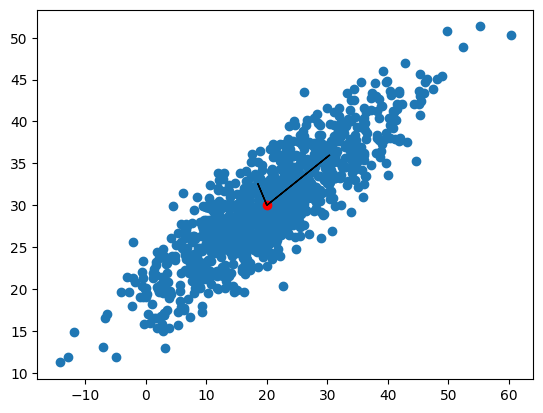

In [5]:
plt.scatter([i[0] for i in x], [i[1] for i in x])
plt.scatter(b[0], b[1], color="red")
plt.arrow(b[0], b[1], 12 * v1[0], 12 * v1[1]) # x, y, delta x, delta y
plt.arrow(b[0], b[1], 3 * v2[0], 3 * v2[1])

# gli assi v1 e v2 sono i principali --> ovvio, hai generato i punti in quel modo
# ottieni gli assi sommando al centro (b) i loro componenti --> moltiplica anche per il loro fattore di scala per mostrare il peso relativo di ogni asse

Perform PCA on the matrix $X$:

$\boldsymbol{\mu} = \frac{1}{n} \sum_{i=1}^{n} \mathbf{x}_i$

$\overline{X} = X - \boldsymbol{\mu} [1,\dots,1]$

$\overline{X} = U \Sigma V^T$

In [6]:
m = x.shape[0]
n = x.shape[1]

h = np.identity(m) - (1/m) * np.ones((m, m)) # matrice centrale
x_center = h @ x # a ogni punto sottraggo il centroide --> (20, 30)

cov_mat = (x_center.T @ x_center) / (n - 1) # calcolo la matrice di covarianza

u, s, vt = np.linalg.svd(cov_mat)

print(u.shape, s.shape, vt.shape)
# ovviamente i PC sono, in generale, tanti quanti le colonne di x --> ovviamente, ogni feature ha il suo asse --> alcuni però sono inutili

(2, 2) (2,) (2, 2)


In [7]:
print(vt.T[:, 0], vt.T[:, 1]) # questi vettori sono già ortonormali --> importantissimo
print(v1, v2)
# i PC sono quelli che mi aspettavo --> il fatto che abbiano il segno cambiato non fa nessuna differenza

[-0.87514934 -0.4838529 ] [-0.4838529   0.87514934]
[0.8660254 0.5      ] [-0.5        0.8660254]


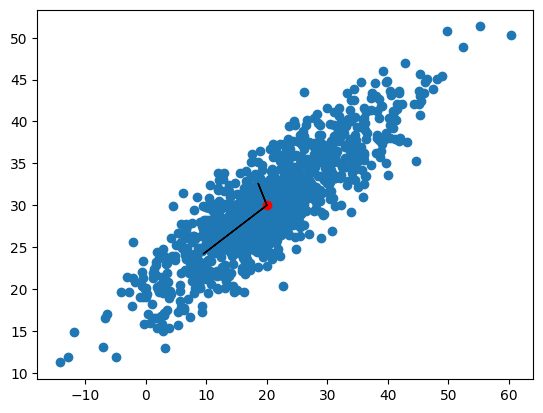

In [8]:
plt.scatter([i[0] for i in x], [i[1] for i in x])
plt.scatter(b[0], b[1], color="red")
plt.arrow(b[0], b[1], 12 * vt.T[:, 0][0], 12 * vt.T[:, 0][1]) # x, y, delta x, delta y
plt.arrow(b[0], b[1], 3 * vt.T[:, 1][0], 3 * vt.T[:, 1][1])

# viene esattamente come prima --> hai trovato i veri PC del dataset --> l'asse v1 è al contrario, ma non fa differenza

Compute the coordinates of the point in x with respect to the principal components of the data: $\Phi = X\:V$

In [9]:
phi = x @ vt.T # se moltiplichi per x @ vt.T[:, 0:k] calcoli la direttamente una matrice ridotta con PCA del dataset x --> utilizzo principale --> k feature mantenute
print(x, "\n*************************************************\n", phi)
# come vedi in phi c'è molta più varianza --> esattamente come dovrebbe essere

[[26.79117175 34.4548997 ]
 [25.82148472 32.74315563]
 [18.48789543 28.76233579]
 ...
 [34.14038182 33.79953114]
 [ 9.68098642 25.0455086 ]
 [14.24619123 25.01805135]] 
*************************************************
 [[-40.11737949  17.19019663]
 [-38.44052618  16.16135082]
 [-30.09640912  16.2259174 ]
 ...
 [-46.23193387  13.06071466]
 [-20.59065088  17.23438701]
 [-24.5726016   15.00147022]]


# Ora calcoliamo le coordinate di ogni punto rispetto al componente principale

In [10]:
pca_x = list()
for point in x:
    proj = np.array([point @ vt.T[:, 0]])
    pca_x.append(proj)
pca_x = np.array(pca_x)

print(pca_x[0:25]) # corrispondono ai valori trovati moltiplicando le matrici --> nello specifico questa è la prima colonna di phi

[[-40.11737949]
 [-38.44052618]
 [-30.09640912]
 [-28.51367884]
 [-34.82368551]
 [-24.22229986]
 [-33.39889178]
 [-33.6602025 ]
 [-25.85107811]
 [-29.34453652]
 [-11.38501221]
 [-36.42234039]
 [-50.29371824]
 [-19.62834802]
 [-30.05438914]
 [-22.06570305]
 [-42.36262642]
 [-52.11405863]
 [-33.50930958]
 [-30.47824088]
 [-37.22985852]
 [-30.42674673]
 [-30.35772689]
 [-21.68654421]
 [-11.98918016]]


# Ora ridisegniamo il dataset, ma stavolta come asse di riferimento usiamo il PC dominante

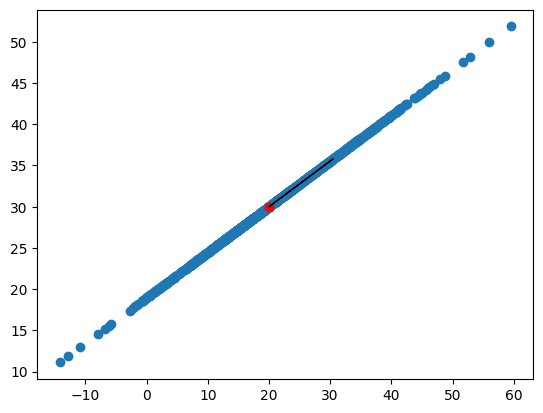

In [15]:
x_1d = list()
translation_vector = b - vt.T[:, 0] * (b @ vt.T[:, 0]) # se vuoi riavere i punti nello spazio e nella forma originale aggiungi: centroide - proj(centroide | PC space)
for coeff in pca_x: # tutte queste proiezioni funzionano bene perché le colonne di v (PC) sono già dei versori ortogonali fra di loro
    x_1d.append(vt.T[:, 0] * coeff[0] + translation_vector) # in questo caso uno solo, in generale dovresti sommare le proiezioni su tutti i PC dominanti che ti interessano
x_1d = np.array(x_1d)

# solitamente dovresti dividere per la norma di v quando fai le proiezioni ortogonali --> in questo caso no, perché v è già un versore
# il centroide è importante solo in questo caso --> se non ti è dato lo trovi facendo la media di tutti i dati su tutte gli assi --> baricentro

plt.scatter([i[0] for i in x_1d], [i[1] for i in x_1d])
plt.scatter(b[0], b[1], color="red")
plt.arrow(b[0], b[1], -12 * vt.T[:, 0][0], -12 * vt.T[:, 0][1]) # x, y, delta x, delta y --> hai messo i segni negativi solo per rendere più chiaro il grafico

In [53]:
# ecco il nuovo grafico, ma con dimensionalità ridotta --> la feature indotta più informativa è: x * -0,869 + y * -0,49
# i punti sono già centrati giusti perché in x c'è ancora l'informazione sul centro --> invece i PC non hanno nessuna indicazione sul centro, ma come vedi non importa

# Infine partiamo da phi e ricostruiamo i punti iniziali

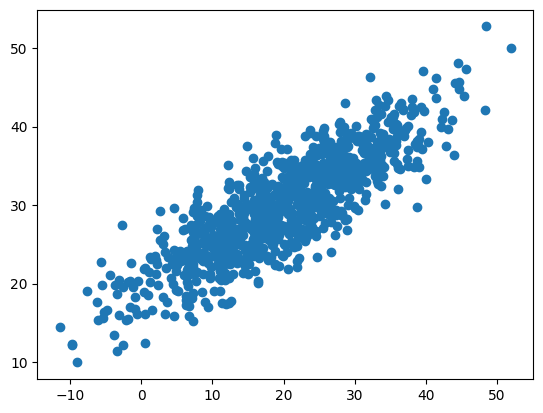

In [57]:
x_2d = phi @ np.linalg.inv(vt.T)
plt.scatter([i[0] for i in x_2d], [i[1] for i in x_2d])

# per ricostruire il dataset iniziale x tin servono tutti i PC, non solo i più importanti --> infatti è anche l'unico caso in cui v è invertibile (quadrata)

# Appendice

[[-1.         -2.33333333]
 [-1.         -1.33333333]
 [ 2.          3.66666667]]


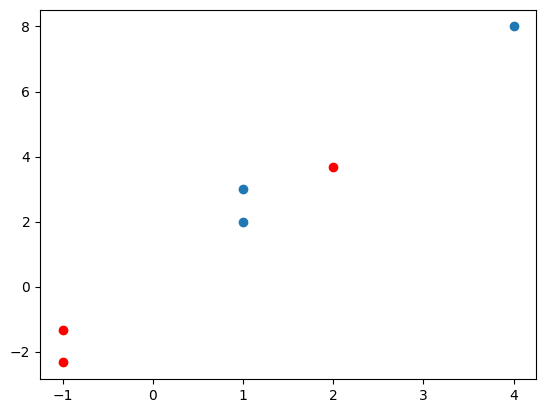

In [54]:
mat = np.array([
    [1, 2],
    [1, 3],
    [4, 8]
])

mat_center = np.identity(3) - (1 / 3) * np.ones((3, 3))
new_mat = mat_center @ mat # in pratica, a ogni punto sottrai il centroide del dataset
print(new_mat)

plt.scatter([i[0] for i in mat], [i[1] for i in mat])
plt.scatter([i[0] for i in new_mat], [i[1] for i in new_mat], color="red")

# la matrice new_mat è la matrice mat, ma con i punti centrati nell'origine n-dimensionale --> pensa come se traslasse i punti per avere il baricentro nell'origine

# Centroide del dataset

In [61]:
c = x.mean(axis=0)
print(np.round(c, 2)) # il centro vero è b --> (20, 30) --> direi che funziona alla perfezione --> metodo veloce per centroide delle matrici (dataset)

[20.01 29.99]
